In [2]:
import pennylane as qml
import numpy as np

In [3]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(state=None):
    qml.StatePrep(state, wires=range(2))
    return qml.state()

state = circuit([1/2, 1/2, 1/2, 1/2])

print(state)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


We can normalize the state

In [4]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(state=None):
    qml.StatePrep(state, wires=range(2), normalize=True)
    return qml.state()

state = circuit([1/2, 0, 0, 1/2])

print(state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


We can initialize in basis states. This code initalizes a three-qubit system in the state $|100\rangle$.

In [5]:
state = qml.BasisState(np.array([1, 0, 0]), wires=range(3))
print(state)

BasisState(array([1, 0, 0]), wires=[0, 1, 2])


Apply unitary $U$ to qubit 0 and unitary $V$ to qubits 0 and 1.

In [6]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def qubit_unitaries(U, V):
    qml.QubitUnitary(U, wires=0)
    qml.QubitUnitary(V, wires=[0,1])
    return qml.state()

U = np.array([[-0.69165024-0.50339329j,  0.28335369-0.43350413j],
       [ 0.1525734 -0.4949106j , -0.82910055-0.2106588j ]])
V = np.array([[-0.01161649+0.12340198j,  0.24202953+0.47179157j,
        -0.66720111+0.23783294j,  0.38909577-0.22439714j],
       [-0.47281374+0.235468j  , -0.51436345+0.28615452j,
         0.34116689+0.18781118j,  0.08677015-0.46405913j],
       [-0.53198348+0.60728927j,  0.34990852-0.34440384j,
         0.00247372-0.07165224j,  0.18828175+0.257979j  ],
       [-0.07641446-0.2190734j ,  0.27910452-0.23115134j,
         0.03829659-0.58309818j,  0.21999088-0.65189823j]])

print(qubit_unitaries(U,V))

[ 0.08606318+0.28698854j  0.59055748-0.06504235j  0.63856782-0.16439135j
 -0.34016643+0.08207004j]


We can apply controlled operations/gates. For instance, apply $RX(\theta)$ to qubit 1 controlled on qubit 0 being 1. **The following code only works if unitary we want to apply is implemented in PennyLane!**

In [15]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def controlled_gate_circuit(angle):
    qml.PauliX(wires=0) # map first qubit, which starts as |0>, to the state |1>
    qml.ctrl(op=qml.RX, control=0, control_values=1)(angle, wires=1)
    return qml.state()

print(controlled_gate_circuit(0.5))

[0.        +0.j         0.        +0.j         0.96891242+0.j
 0.        -0.24740396j]


If unitary not implemented in PennyLane...
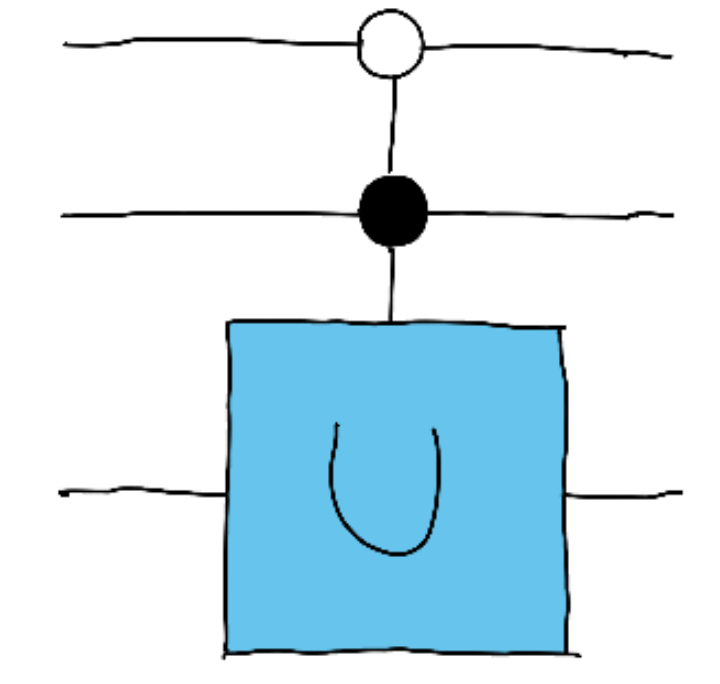

In [17]:
dev = qml.device("default.qubit", wires=3)

U =[[ 0.94877869,  0.31594146], [-0.31594146,  0.94877869]]

@qml.qnode(dev)
def circuit_controlled_unitary():
    qml.PauliX(wires=1)
    qml.ControlledQubitUnitary(U, control_wires=[0, 1], wires=2, control_values=[0, 1], )
    
    return qml.state()

print(circuit_controlled_unitary())

[ 0.        +0.j  0.        +0.j  0.94877869+0.j -0.31594146+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


Inverse operations

In [19]:
qml.adjoint(qml.RX(0.5, wires = 0))
# equivalently, as a wrapper,
qml.adjoint(qml.RX)(0.5, wires = 0) 

Adjoint(RX(0.5, wires=[0]))

If the argument of qml.adjoint is a quantum function, **must be used as a wrapper**. For instance, to calculate the adjoint of the following circuit:

In [24]:
def q_function(theta, phi, omega):
  qml.RX(theta, wires = 0)
  qml.RY(phi, wires = 1)
  qml.RZ(omega, wires = 2)

# we need to write
theta, phi, omega = np.zeros(3)
qml.adjoint(q_function)(theta, phi, omega)

[Adjoint(RZ(np.float64(0.0), wires=[2])),
 Adjoint(RY(np.float64(0.0), wires=[1])),
 Adjoint(RX(np.float64(0.0), wires=[0]))]